In [ ]:
# Import Libraries
import itertools
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [ ]:
df = pd.read_csv("/content/airline-passengers.csv", parse_dates=True, index_col="month")
df.columns

Index(['total_passengers'], dtype='object')

In [ ]:
df_1 = df.copy()
df_1

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [ ]:
df.info

<bound method DataFrame.info of             total_passengers
month                       
1949-01-01               112
1949-02-01               118
1949-03-01               132
1949-04-01               129
1949-05-01               121
...                      ...
1960-08-01               606
1960-09-01               508
1960-10-01               461
1960-11-01               390
1960-12-01               432

[144 rows x 1 columns]>

In [ ]:
# Exploratory Data Analysis:
def df_analysis(dataframe, head=10):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


df_analysis(df)

Shape: (144, 1)
Types: total_passengers    int64
dtype: object
Head:             total_passengers
month                       
1949-01-01               112
1949-02-01               118
1949-03-01               132
1949-04-01               129
1949-05-01               121
1949-06-01               135
1949-07-01               148
1949-08-01               148
1949-09-01               136
1949-10-01               119
Tail:             total_passengers
month                       
1960-03-01               419
1960-04-01               461
1960-05-01               472
1960-06-01               535
1960-07-01               622
1960-08-01               606
1960-09-01               508
1960-10-01               461
1960-11-01               390
1960-12-01               432
NA: total_passengers    0
dtype: int64
Quantiles:                    0.00   0.05   0.50    0.95    0.99   1.00
total_passengers  104.0  121.6  265.5  488.15  585.79  622.0


In [ ]:
print("Min Date:", (df.index).min())
print("Max Date:", (df.index).max())

Min Date: 1949-01-01 00:00:00
Max Date: 1960-12-01 00:00:00


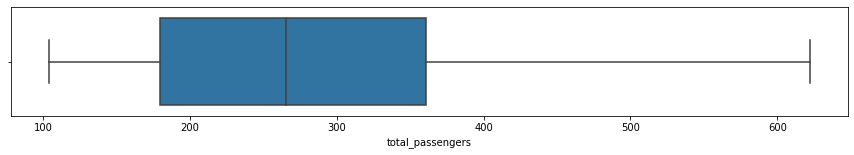

In [ ]:
fig = plt.subplots(figsize=(15, 2))
ax = sns.boxplot(df["total_passengers"])

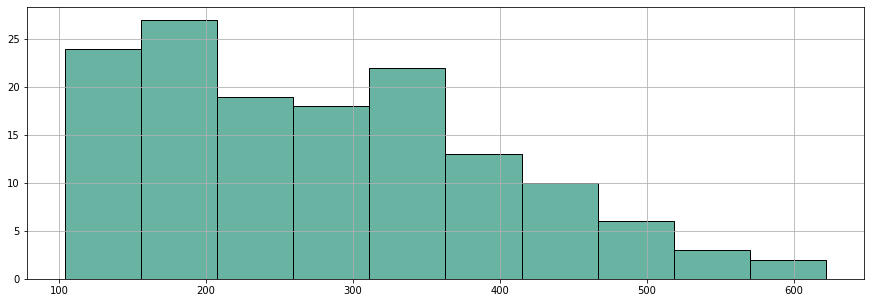

In [ ]:
df["total_passengers"].hist(figsize=(15,5), edgecolor="black", color="#69b3a2")

In [ ]:
# Data Preprocessing
df["total_passengers"] = df["total_passengers"].astype('float')
df.index.freq = "MS"

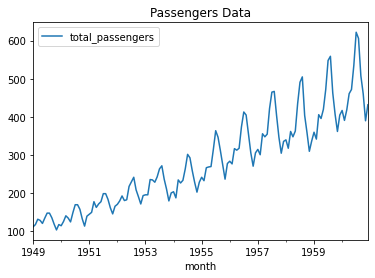

In [ ]:
# Visualization:
df[['total_passengers']].plot(title='Passengers Data')
plt.show()  # Trend and seasonality can be seen in the graph.

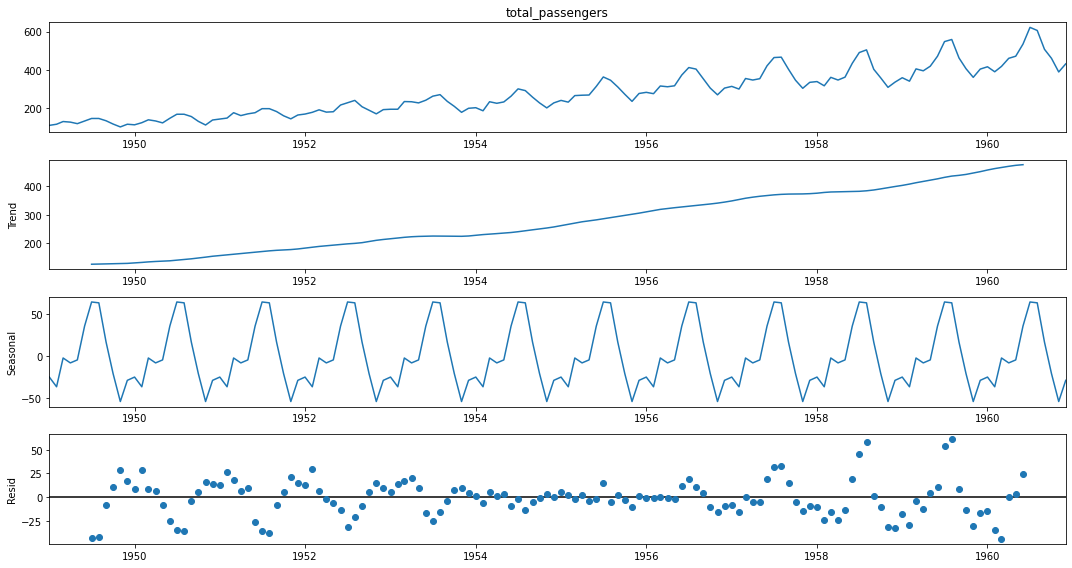

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 15,8
decomposition = sm.tsa.seasonal_decompose(df['total_passengers'], model='additive')
fig = decomposition.plot()
plt.show()

# An additive model is linear where changes over time are consistently made by the same amount.
# A linear trend is a straight line.
# A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

In [ ]:
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid)
print(decomposition.observed)

month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Freq: MS, Name: trend, Length: 144, dtype: float64
month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Freq: MS, Name: seasonal, Length: 144, dtype: float64
month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Freq: MS, Name: resid, Length: 144, dtype: float64
month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
19

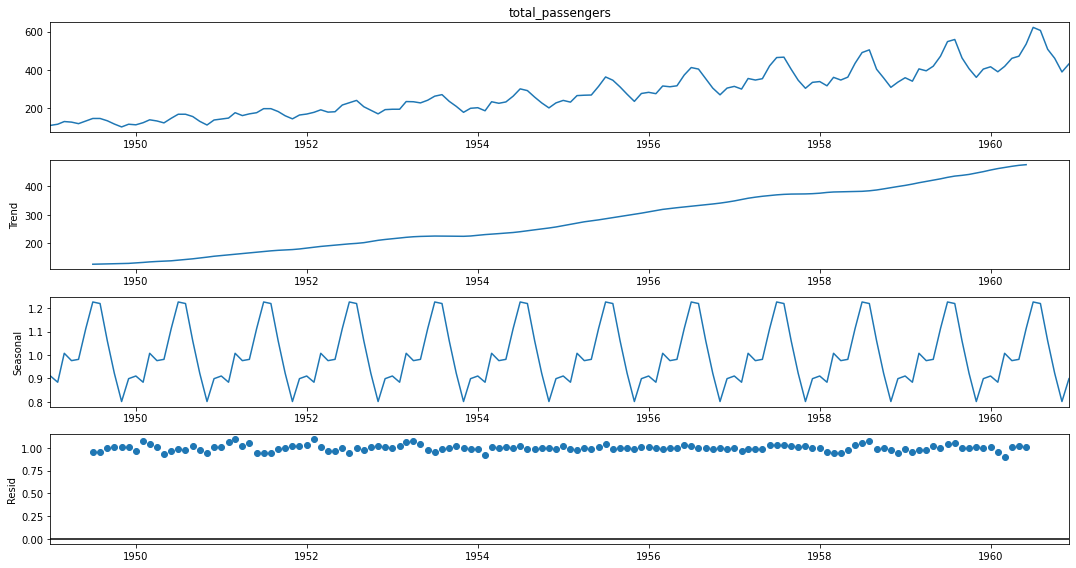

In [ ]:
rcParams['figure.figsize'] = 15,8
decomposition = sm.tsa.seasonal_decompose(df['total_passengers'], model='multiplicative')
fig = decomposition.plot()
plt.show()


# A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.
# A nonlinear trend is a curved line.
# A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

In [ ]:
# Data Normalization:
sequence = df["total_passengers"].values
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(sequence.reshape(-1, 1))
df_scaled.shape

(144, 1)

In [ ]:
df_scaled[0:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

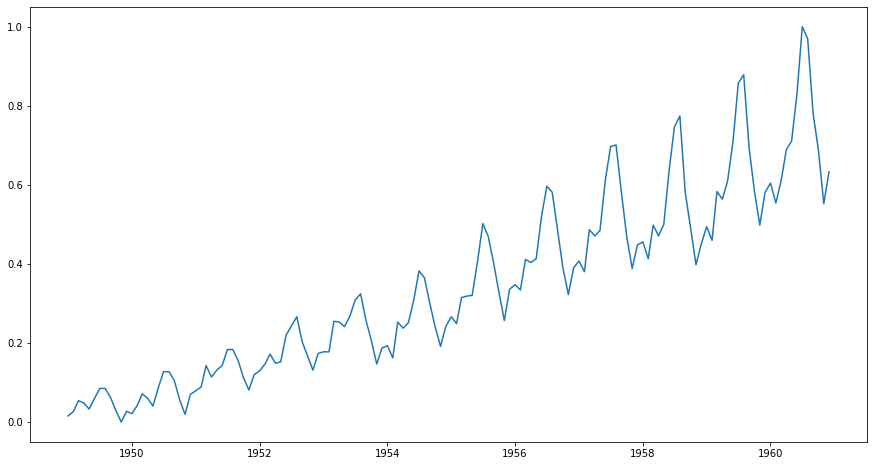

In [ ]:
plt.plot(df.index, df_scaled)
plt.show()

In [ ]:
# Split Data
split_size = 0.8
train_size = int(len(sequence) * split_size)
test_size = len(sequence) - train_size
train, test = df_scaled[:train_size,:], df_scaled[train_size:len(sequence),:]
print("Number of entries (training set, test set): " + str((len(train), len(test))))
print(train.shape)
print(test.shape)

Number of entries (training set, test set): (115, 29)
(115, 1)
(29, 1)


In [ ]:
def create_dataset(dataframe, window_size=1):
    X, Y = [], []
    for i in range(len(dataframe) - window_size - 1):
        X.append(dataframe[i:(i + window_size), 0])
        Y.append(dataframe[i + window_size, 0])
    return np.array(X), np.array(Y)

In [ ]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)

In [ ]:
print("Original training data shape:")
print(train_X.shape)

Original training data shape:
(113, 1)


In [ ]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [ ]:
print("New training data shape:")
print(train_X.shape)

New training data shape:
(113, 1, 1)


In [ ]:
# Model
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, input_shape=(1, window_size), return_sequences=True),
        tf.keras.layers.Dropout(.2),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dropout(.2),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dropout(.2),
        tf.keras.layers.Dense(1)
    ])

model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=tf.keras.losses.Huber(),
                  metrics=["mae"])

early_stop = EarlyStopping(monitor='val_loss', patience=40)

history = model.fit(train_X,
                    train_Y,
                    batch_size=32,
                    epochs=100,
                    verbose=2,
                    callbacks=[early_stop],
                    validation_data=(test_X, test_Y))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 128)            66560     
                                                                 
 dropout_3 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             49408     
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

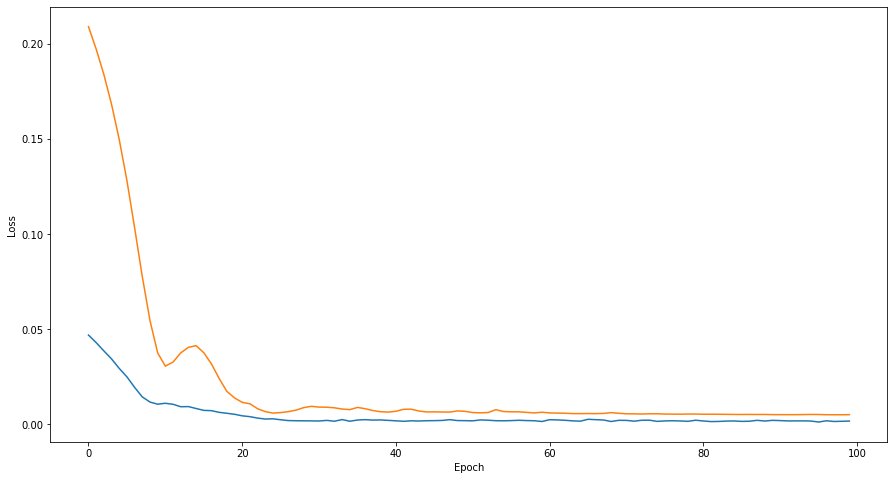

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Prediction
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

In [ ]:
rmse_train, train_predict = predict_and_score(model, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model, test_X, test_Y)
print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)


1/1 [==============================] - 0s 25ms/step
Training data score: 26.63 RMSE
Test data score: 52.48 RMSE


In [ ]:
# Start with training predictions.
train_predict_plot = np.empty_like(df_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Test predictions.
test_predict_plot = np.empty_like(df_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(df) - 1, :] = test_predict

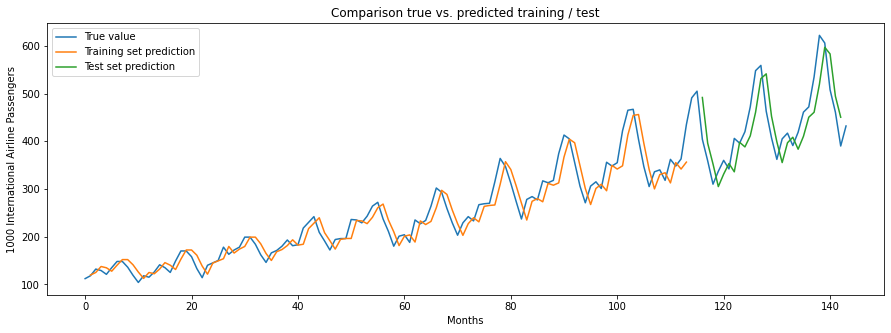

In [ ]:
# Creating the graph
plt.figure(figsize=(15, 5))
plt.plot(scaler.inverse_transform(df_scaled), label = "True value")
plt.plot(train_predict_plot, label="Training set prediction")
plt.plot(test_predict_plot, label="Test set prediction")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()